In [49]:
import os
import matplotlib.pyplot as plt
import skimage
import numpy as np
from skimage import io

# Importação de Imagens

In [13]:
filename = os.path.join(skimage.data_dir, 'fotos/bios/GUU-Draco-Amo9-29Mai70-515-29,1-2-0,5-DIR.jpg')
img = io.imread('C://repos/msc_ds_vc/photos/bios/GUU-Draco-Amo9-29Mai70-515-29,1-2-0,5-DIR.jpg')
print(img.shape)


(574, 764, 3)


# Separação por canais:

## Red

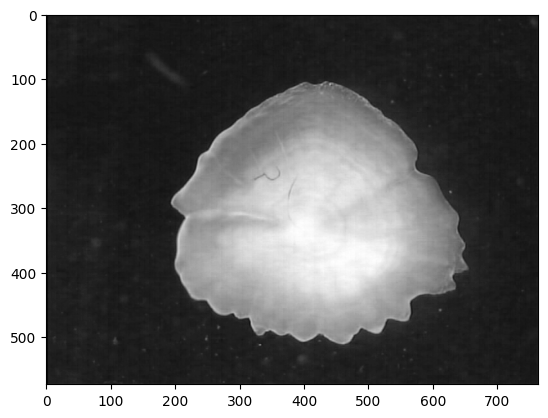

In [14]:
plt.imshow(img[:,:,0], cmap=plt.cm.gray)

# Green

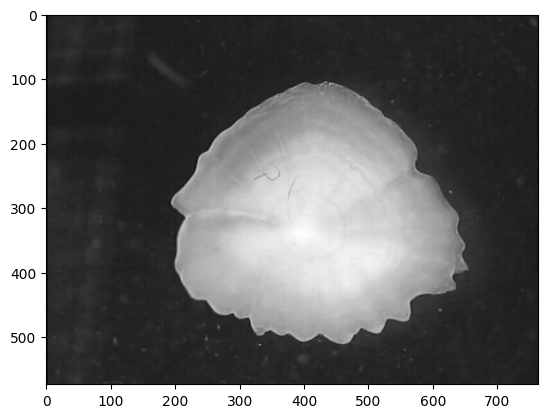

In [15]:
plt.imshow(img[:,:,1], cmap=plt.cm.gray)

# Blue

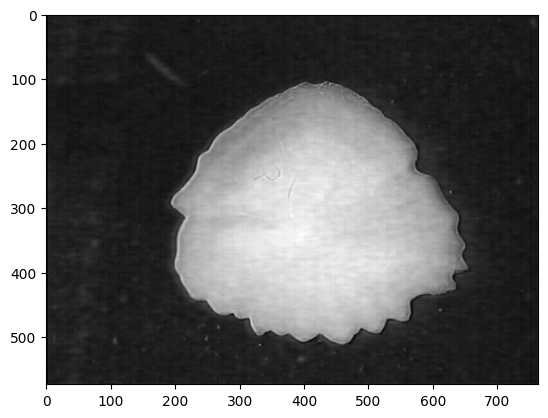

In [16]:
plt.imshow(img[:,:,2], cmap=plt.cm.gray)

## Mix

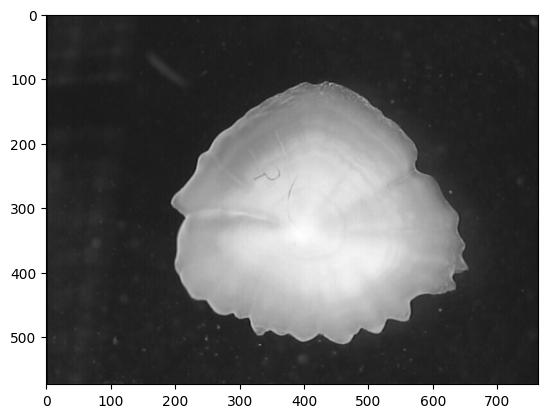

In [21]:
img_g = skimage.color.rgb2gray(img)
plt.imshow(img_g, cmap=plt.cm.gray)

# Remoção de ruído

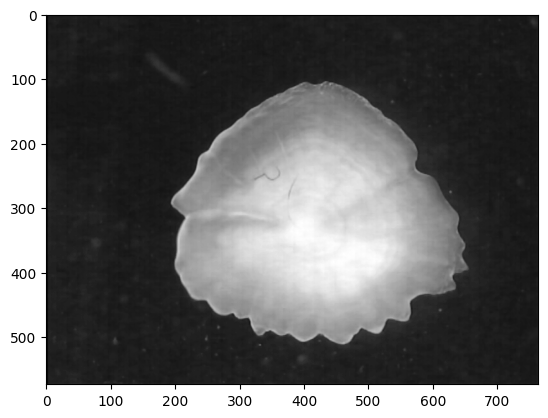

In [22]:
img_f = skimage.filters.median(img[:,:,0])
plt.imshow(img_f, cmap=plt.cm.gray)

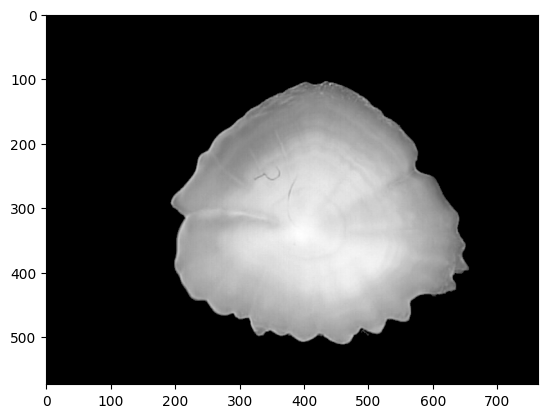

In [47]:
img_f = skimage.filters.apply_hysteresis_threshold(img_g, low = 0.2, high = 0.8)
plt.imshow(img_f)

teste = img_g * img_f
plt.imshow(teste, cmap=plt.cm.gray)

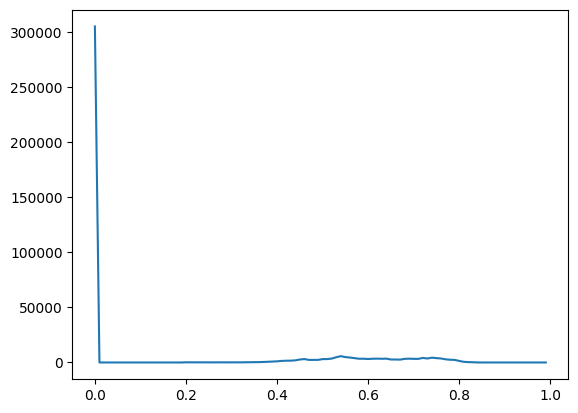

In [50]:
histogram, bin_edges = np.histogram(teste, bins=100, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

In [134]:
def afinador(input):
    min = np.partition(input,1)[1]
    max = input.max()
    res = (input-min)/(max - min)
    return res

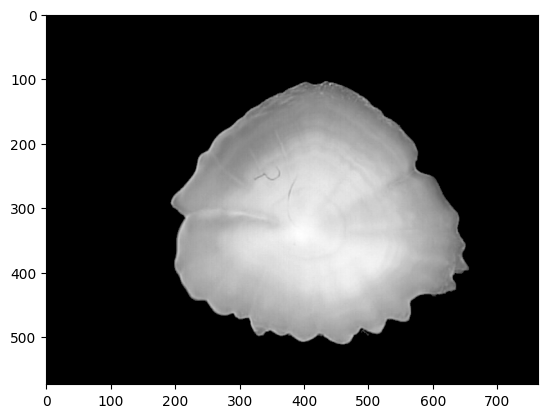

In [135]:
plt.imshow(afinador(teste), cmap=plt.cm.gray)

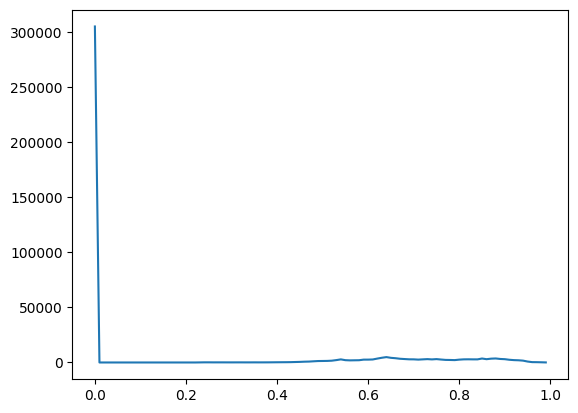

In [136]:
afinador(teste).max()
histogram, bin_edges = np.histogram(afinador(teste), bins=100, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

In [137]:
teste.max()

0.8472450980392157

# mascara hialinos

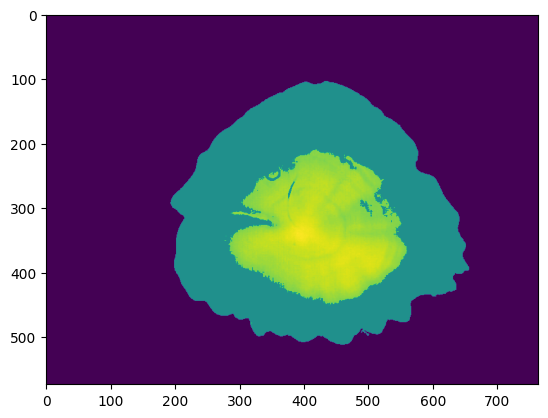

In [138]:
temp = afinador(teste)
mask_h = np.where(((temp>0) & (temp < 0.8)),0.5,temp)
plt.imshow(mask_h, cmap=plt.cm.gray)
plt.imshow(mask_h)

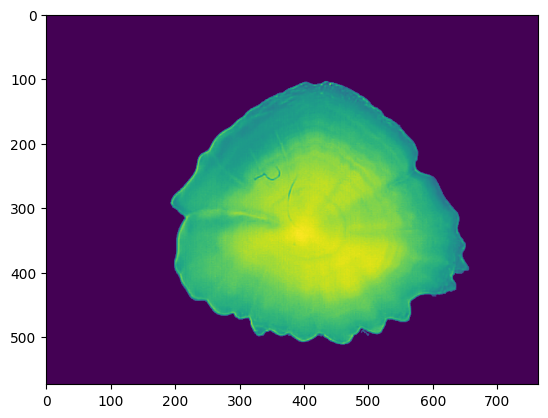

In [141]:
plt.imshow(skimage.filters.unsharp_mask(temp))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

1.0

In [40]:
dir(skimage)
dir(skimage.filters)

['LPIFilter2D',
 'apply_hysteresis_threshold',
 'butterworth',
 'correlate_sparse',
 'difference_of_gaussians',
 'farid',
 'farid_h',
 'farid_v',
 'frangi',
 'gabor',
 'gabor_kernel',
 'gaussian',
 'hessian',
 'inverse',
 'laplace',
 'median',
 'meijering',
 'prewitt',
 'prewitt_h',
 'prewitt_v',
 'rank',
 'rank_order',
 'roberts',
 'roberts_neg_diag',
 'roberts_pos_diag',
 'sato',
 'scharr',
 'scharr_h',
 'scharr_v',
 'sobel',
 'sobel_h',
 'sobel_v',
 'threshold_isodata',
 'threshold_li',
 'threshold_local',
 'threshold_mean',
 'threshold_minimum',
 'threshold_multiotsu',
 'threshold_niblack',
 'threshold_otsu',
 'threshold_sauvola',
 'threshold_triangle',
 'threshold_yen',
 'try_all_threshold',
 'unsharp_mask',
 'wiener',
 'window']

In [11]:
img = skimage.filters.thresholding.threshold_otsu(moon[:,:,1])
mask = moon < img

In [12]:
plt.imshow(mask)

Error in callback <function _draw_all_if_interactive at 0x0000013E84870A60> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>